In [2]:
import numpy as np
from numpy.random import normal, seed
from numpy import exp, log, sqrt
from scipy.stats import norm
import matplotlib.pyplot as plt

In [3]:
S0 = 100
K = 92
r = 0.06
sigma = 0.23
T = 150 / 365

** The Black-Scholes Formula for European Call Options**
$$
    S_0 \Phi(d_+) - K e^{-rT} \Phi(d_-)
$$

Where,
- $d_+ = \frac{1}{\sigma\sqrt T}\left(\log \frac{S_0}{K}+ (r + \frac{1}{2}\sigma^2)T\right)$
- $d_- = \frac{1}{\sigma\sqrt T}\left(\log \frac{S_0}{K}+ (r - \frac{1}{2}\sigma^2)T\right) = d_+ - \sigma\sqrt T$

In [4]:
def european_option(s, k, sigma, rate, ttm):
    """
    Parameters
    ----------
    s: float
        The value of the underlying at t=0
    k: float
        The value of the strike
    sigma: float
        Volatility of the underlying
    rate: float
        The risk-free interest rate
    ttm: float
        The time to maturity –in years– to maturity.
    """
    d1 = (log(s / k) + (r + sigma ** 2 / 2) * ttm) / (sigma * sqrt(ttm))
    d2 = d1 - sigma * sqrt(ttm)
    return s * norm.cdf(d1) - k * exp(-rate * ttm) * norm.cdf(d2)

In [5]:
european_option(S0, K, sigma, r, T)

12.125338828163677

** Simulating payoff **

Consider
$$
    S_t = S_0e^{\sigma W_t + (r - \frac{1}{2}\sigma^2)t}
$$

under the $Q$-measure, for a claim $g(T, S_T)$, the risk-neutral expected value is given by
$$
    c = e^{-rT}\mathbb{E}[g(S_T)]
$$

In [30]:
seed(42)

def mean_price(S0, K, T, r, sigma, nrounds, nsim):
    """
    Compute the mean price under the risk neutral
    probability Q.
    
    Parameters
    ----------
    S0: float
        The value of the underlying at t=0
    K: float 
        The value of the strike for the call option
    T: float
        The time to maturity (in years)
    r: float
        The risk-free interest rate
    sigma: float
        The volatility of the underlying
    nrounds: int
        The number of rounds
    nsim: int
        The number of simulations per round
        
    Returns
    -------
    numpy ndarray:
        A nrounds x 1 numpy array where each entry
        is the mean value of nsim computations of
        the claim at time T.
    """
    WT = normal(scale=sqrt(T), size=(nrounds, nsim))
    ST = ST = S0 * exp(sigma * WT + (r - sigma ** 2 / 2) * T)
    payoff = np.maximum(ST - K, 0)
    return np.mean(payoff, axis=1)

In [59]:
#number of rounds, and simulations per round
nrounds, nsim = 10_000, 100_000
prices = mean_price(S0, K, T, r, sigma, nrounds, nsim)
    
price_mean = exp(-r * T) * prices.mean()

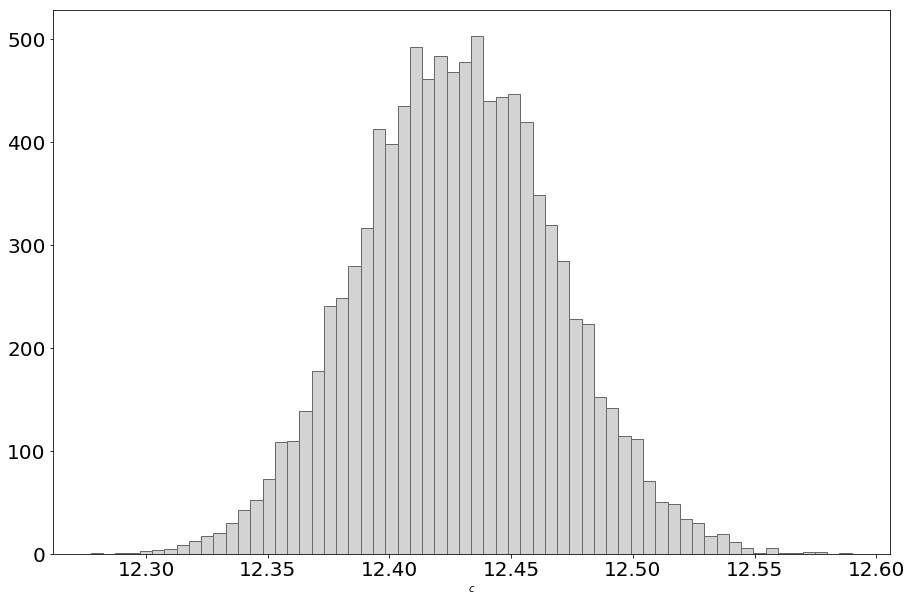

In [66]:
plt.figure(figsize=(15,10))
plt.hist(prices, bins="auto", color="lightgray", edgecolor="dimgray")
plt.xlabel("$c$")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig("../images/montecarlo_distribution.pdf")
plt.show()

In [61]:
price_mean, prices.std()

(12.1256681390074, 0.040072312579879442)

In [62]:
price_mean - _5

0.00032931084372300745